# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


In [3]:
city

'husavik'

In [4]:
lats

array([-61.01618113, -29.11385302, -20.6816862 , ..., -71.14319453,
       -30.01134854,  81.44908431])

In [5]:
len(lats)

1500

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
## Example api call
# api.openweathermap.org/data/2.5/weather?q=London&{YOUR_API_KEY}

In [7]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/2.5/weather?&appid="+ weather_api_key
#url

In [8]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/2.5/weather?" 


 # Create endpoint URL with each city
#city_url = url +"q="+city+"&appid="+ weather_api_key
    
#city_url
    

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q=" 


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
#     except Exception as e:
#         print(e)
   
    except:
        print("City not found. Skipping...")
        #pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | magomeni
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | port-cartier
Processing Record 15 of Set 1 | broken hill
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | upington
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | ahipara
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22

Processing Record 37 of Set 4 | severo-kurilsk
Processing Record 38 of Set 4 | luganville
Processing Record 39 of Set 4 | zhicheng
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | arlit
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | bubaque
Processing Record 44 of Set 4 | brookings
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | vilhena
Processing Record 47 of Set 4 | jumla
Processing Record 48 of Set 4 | atar
Processing Record 49 of Set 4 | salalah
Processing Record 0 of Set 5 | tuy hoa
Processing Record 1 of Set 5 | princeton
Processing Record 2 of Set 5 | lobito
Processing Record 3 of Set 5 | enugu
Processing Record 4 of Set 5 | udachnyy
Processing Record 5 of Set 5 | butaritari
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | neyshabur
Processing Record 8 of Set 5 | berlevag
Processing Record 9 of Set 5 | gazojak
Processing Record 10 of Set 5 | vaita

Processing Record 26 of Set 8 | qaqortoq
Processing Record 27 of Set 8 | sao filipe
Processing Record 28 of Set 8 | qinzhou
Processing Record 29 of Set 8 | westport
Processing Record 30 of Set 8 | beyneu
Processing Record 31 of Set 8 | santa maria da vitoria
Processing Record 32 of Set 8 | owando
Processing Record 33 of Set 8 | mergui
City not found. Skipping...
Processing Record 34 of Set 8 | guapore
Processing Record 35 of Set 8 | teguldet
Processing Record 36 of Set 8 | tutoia
Processing Record 37 of Set 8 | cerrito
Processing Record 38 of Set 8 | marzuq
Processing Record 39 of Set 8 | lodja
Processing Record 40 of Set 8 | hami
Processing Record 41 of Set 8 | praxedis guerrero
Processing Record 42 of Set 8 | peski
Processing Record 43 of Set 8 | noumea
Processing Record 44 of Set 8 | puerto carreno
Processing Record 45 of Set 8 | pahasu
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | kijang
Processing Record 48 of Set 8 | yokadouma
Processing Record 49 of

Processing Record 14 of Set 12 | belgrade
Processing Record 15 of Set 12 | shu
Processing Record 16 of Set 12 | buariki
City not found. Skipping...
Processing Record 17 of Set 12 | plettenberg bay
Processing Record 18 of Set 12 | warrington
Processing Record 19 of Set 12 | union city
Processing Record 20 of Set 12 | kuusamo
Processing Record 21 of Set 12 | aranjuez
Processing Record 22 of Set 12 | at-bashi
Processing Record 23 of Set 12 | wageningen
Processing Record 24 of Set 12 | raudeberg
Processing Record 25 of Set 12 | wairoa
Processing Record 26 of Set 12 | port hedland
Processing Record 27 of Set 12 | saint anthony
Processing Record 28 of Set 12 | port macquarie
Processing Record 29 of Set 12 | januaria
Processing Record 30 of Set 12 | sangueya
Processing Record 31 of Set 12 | saleaula
City not found. Skipping...
Processing Record 32 of Set 12 | najran
Processing Record 33 of Set 12 | san vicente
Processing Record 34 of Set 12 | sioux lookout
Processing Record 35 of Set 12 | raw

In [10]:
city_url

'https://api.openweathermap.org/data/2.5/weather?q=husavik&appid=0fef351a6156d6f09becd49adde7f37c'

In [11]:
city_data

[{'City': 'mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 280.99,
  'Humidity': 88,
  'Cloudiness': 99,
  'Wind Speed': 6.09,
  'Country': 'NZ',
  'Date': 1688433995},
 {'City': 'lebu',
  'Lat': -37.6167,
  'Lng': -73.65,
  'Max Temp': 285.17,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 8.37,
  'Country': 'CL',
  'Date': 1688433996},
 {'City': 'jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 294.27,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 1.54,
  'Country': 'US',
  'Date': 1688433997},
 {'City': 'tuktoyaktuk',
  'Lat': 69.4541,
  'Lng': -133.0374,
  'Max Temp': 293.15,
  'Humidity': 56,
  'Cloudiness': 20,
  'Wind Speed': 8.75,
  'Country': 'CA',
  'Date': 1688433997},
 {'City': 'busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 285.38,
  'Humidity': 72,
  'Cloudiness': 93,
  'Wind Speed': 10.28,
  'Country': 'AU',
  'Date': 1688433998},
 {'City': 'ribeira grande',
  'Lat': 38.5167,
  'Lng': -28.7,
  'Max Temp': 291.91,

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,280.99,88,99,6.09,NZ,1688433995
1,lebu,-37.6167,-73.6500,285.17,88,100,8.37,CL,1688433996
2,jamestown,42.0970,-79.2353,294.27,90,100,1.54,US,1688433997
3,tuktoyaktuk,69.4541,-133.0374,293.15,56,20,8.75,CA,1688433997
4,busselton,-33.6500,115.3333,285.38,72,93,10.28,AU,1688433998


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,280.99,88,99,6.09,NZ,1688433995
1,lebu,-37.6167,-73.6500,285.17,88,100,8.37,CL,1688433996
2,jamestown,42.0970,-79.2353,294.27,90,100,1.54,US,1688433997
3,tuktoyaktuk,69.4541,-133.0374,293.15,56,20,8.75,CA,1688433997
4,busselton,-33.6500,115.3333,285.38,72,93,10.28,AU,1688433998


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

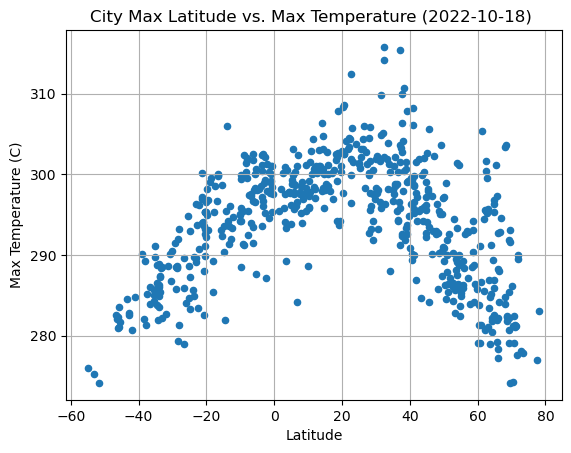

In [16]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot(kind="scatter", x = "Lat", y = "Max Temp")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature (2022-10-18) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

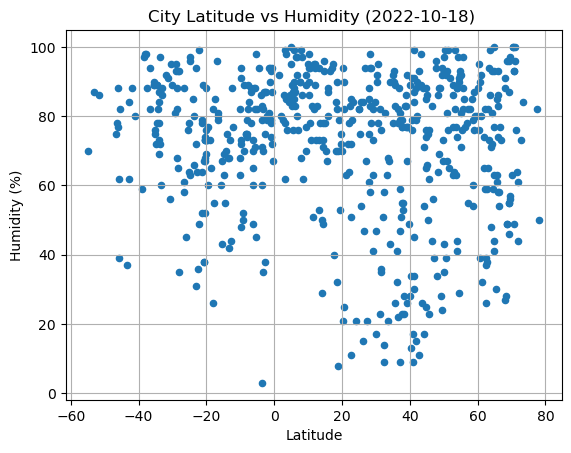

In [17]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x = "Lat", y = "Humidity") 

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18) ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

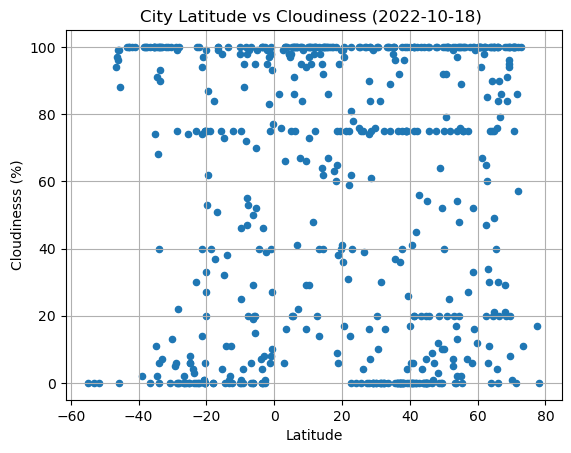

In [18]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x = "Lat", y = "Cloudiness") 

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18) ")
plt.xlabel("Latitude")
plt.ylabel("Cloudinesss (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

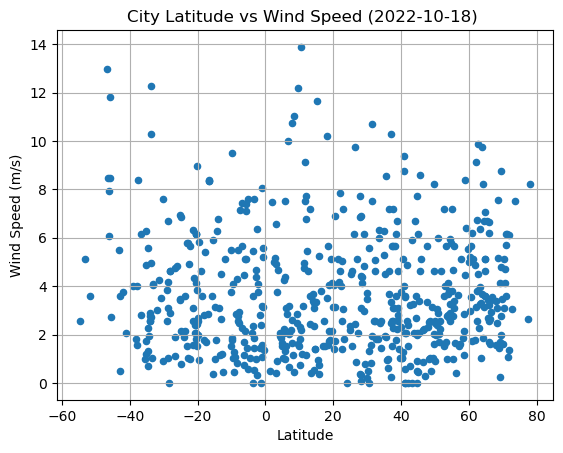

In [19]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x = "Lat", y = "Wind Speed") 

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18) ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots

    
def plot_lin_regress(x_values,y_values,a,b):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    #print r value
    print(f"The r-value is: {rvalue**2}")
    plt.show()    
    


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jamestown,42.0970,-79.2353,294.27,90,100,1.54,US,1688433997
3,tuktoyaktuk,69.4541,-133.0374,293.15,56,20,8.75,CA,1688433997
5,ribeira grande,38.5167,-28.7000,291.91,83,100,3.58,PT,1688433998
6,barrow,71.2906,-156.7887,281.16,76,0,6.17,US,1688433999
11,port-cartier,50.0334,-66.8654,289.27,97,40,0.91,CA,1688434002


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,280.99,88,99,6.09,NZ,1688433995
1,lebu,-37.6167,-73.6500,285.17,88,100,8.37,CL,1688433996
4,busselton,-33.6500,115.3333,285.38,72,93,10.28,AU,1688433998
7,bredasdorp,-34.5322,20.0403,283.76,89,91,2.26,ZA,1688434000
8,bengkulu,-3.8004,102.2655,298.49,86,7,2.08,ID,1688434000


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3911650126811389


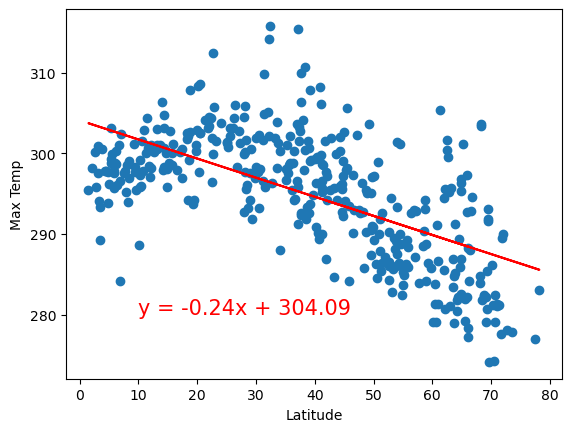

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Label plot 
plt.xlabel('Latitude')
plt.ylabel('Max Temp') 




plot_lin_regress(x_values,y_values,10,280)



The r-value is: 0.6550112986976391


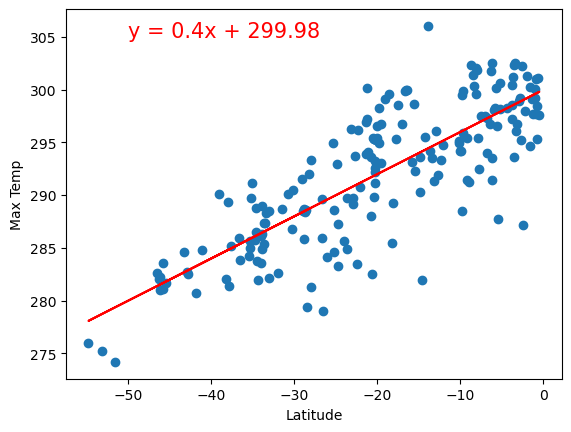

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.xlabel('Latitude')
plt.ylabel('Max Temp') 

plot_lin_regress(x_values,y_values,-50,305)

**Discussion about the linear relationship:** In the Northern Hemisphere, as the latitude increases, the temperature decreases. The opposite is true of the Southern Hemisphere. As the latitude increases here, the temperature also increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.013637416402941286


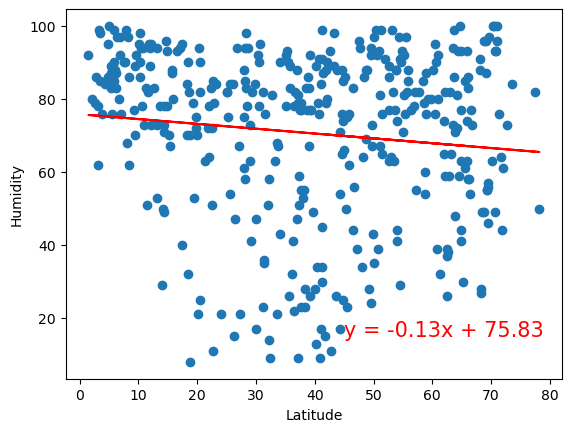

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.xlabel('Latitude')
plt.ylabel('Humidity') 

plot_lin_regress(x_values,y_values,45,15)

The r-value is: 0.007937952536139086


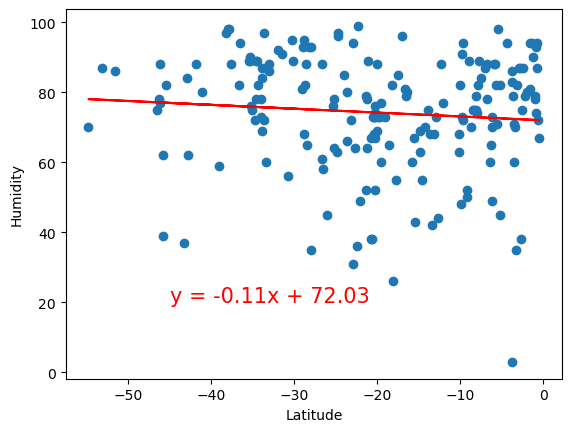

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.xlabel('Latitude')
plt.ylabel('Humidity') 

plot_lin_regress(x_values,y_values,-45,20)

**Discussion about the linear relationship:** Looking at the humidity in comparison to the latitude, there is no significant relationship displayed for either the Northern or Southern Hemispheres.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011375273954151926


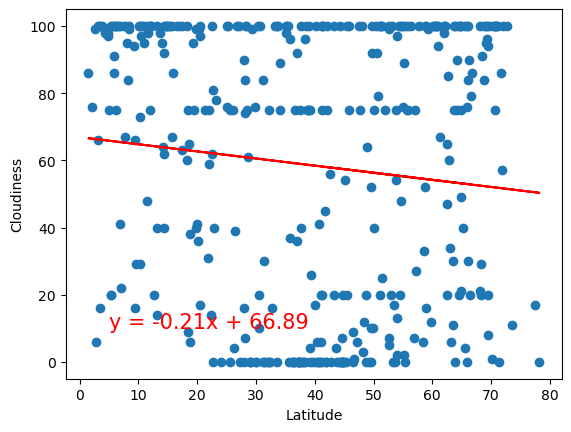

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.xlabel('Latitude')
plt.ylabel('Cloudiness') 

plot_lin_regress(x_values,y_values,5,10)

The r-value is: 0.018099742921016168


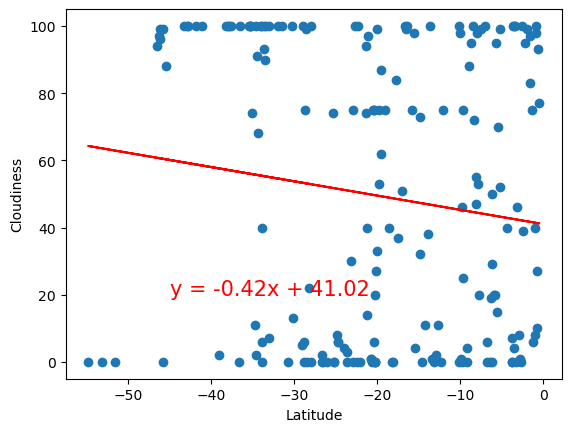

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.xlabel('Latitude')
plt.ylabel('Cloudiness') 

plot_lin_regress(x_values,y_values,-45,20)

**Discussion about the linear relationship:** Looking at the cloudiness in comparison to the latitude, there is no significant relationship displayed for either the Northern or Southern Hemispheres.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0018412768140262789


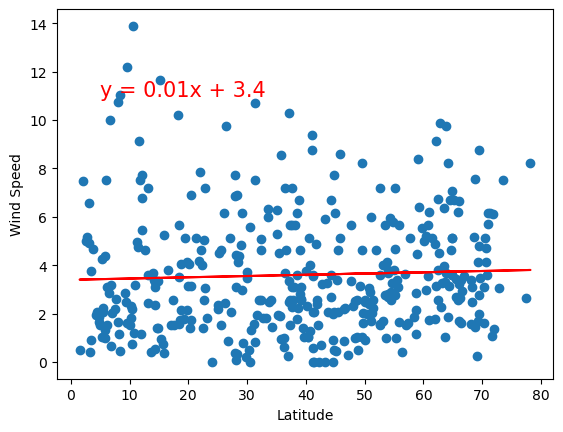

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.xlabel('Latitude')
plt.ylabel('Wind Speed') 

plot_lin_regress(x_values,y_values,5,11)

The r-value is: 0.03552616863822186


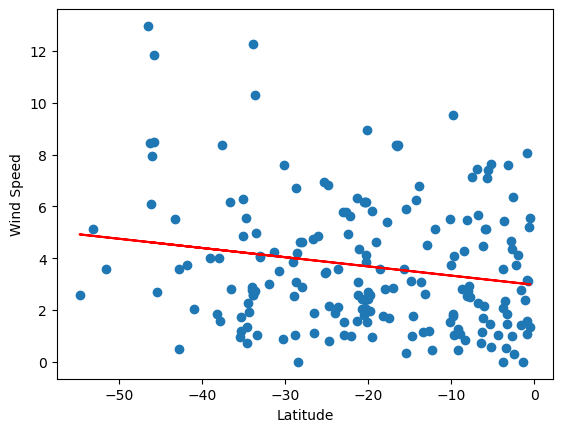

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.xlabel('Latitude')
plt.ylabel('Wind Speed') 

plot_lin_regress(x_values,y_values,-45,20)

**Discussion about the linear relationship:** The wind speed in comparison to the latitude also shows no significant relationship displayed for either the Northern or Southern Hemispheres.  